In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

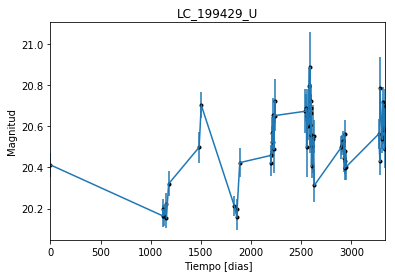

In [2]:
data = np.genfromtxt('LC_199429_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_199429_U')
plt.savefig("LC_199429_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

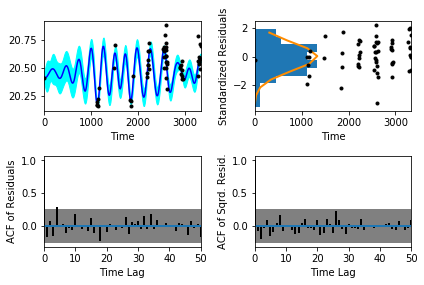

In [5]:
sample.assess_fit()

/usr/local/lib/python2.7/dist-packages/carmcmc/carma_pack.py:619: RuntimeWarning: overflow encountered in square
  psd_samples = np.squeeze(sigmas) ** 2 * np.abs(ma_poly) ** 2 / np.abs(ar_poly) ** 2


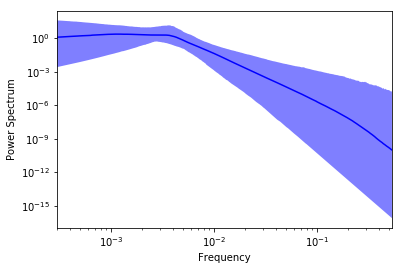

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

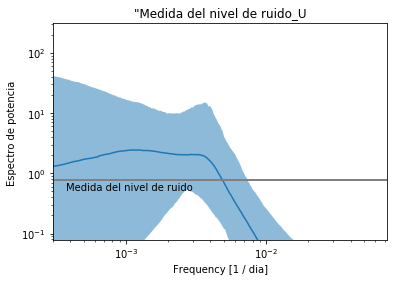

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_199429_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_199429_U')

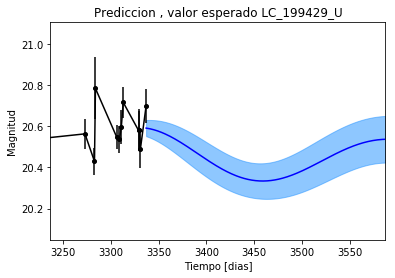

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_199429_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_199429_U')

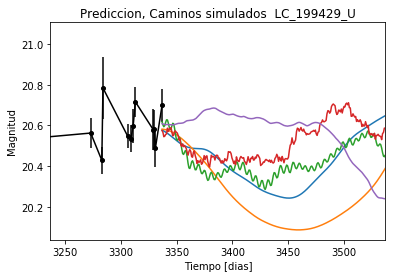

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_199429_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


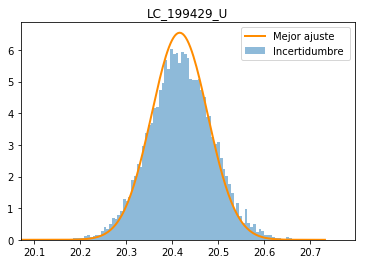

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_199429_U')
plt.savefig("Mejor_ajuste_LC_199429_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_199429_U')

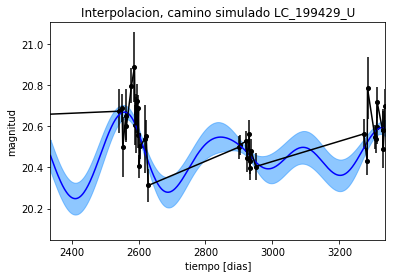

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_U')

Text(0.5,1,'Interpolacion, camino simulado LC_199429_U')

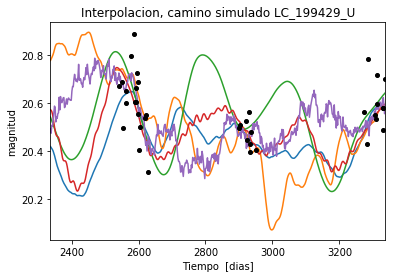

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 371.69940226
Median: 0.00356672680241
Standard deviation: 0.137969764976
68% credibility interval: [ 0.00059598  0.06534085]
95% credibility interval: [  3.34840596e-04   5.06071250e-01]
99% credibility interval: [  3.11707403e-04   8.98010818e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 579.448379624
Median: 0.00203039027908
Standard deviation: 0.0792330118999
68% credibility interval: [ 0.00053493  0.02779041]
95% credibility interval: [ 0.00032898  0.29820272]
99% credibility interval: [  3.08419117e-04   5.61469304e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 380.789561748
Median: 0.0057827351229
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 467.228161849
Median: 74.8358867829
Standard deviation: 1.9451044938
68% credibility interval: [ 72.6909446   76.43966336]
95% credibility interval: [ 70.11059275  77.63561375]
99% credibility interval: [ 68.17599349  78.09612351]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 370.691212035
Median: 0.310514408699
Standard deviation: 1.78684300558
68% credibility interval: [ 0.04062466  2.51066734]
95% credibility interval: [ 0.01395055  6.46187716]
99% credibility interval: [ 0.01040735  8.44746155]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 881.218306325
Median: 0.212886722751
Standard deviation: 8.73648707636
68% credibility interval: [  4.52686707e-03   7.81891179e+00]
95% credibility interval: [  1.0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: nan
Median: 1.42720168083e-17
Standard deviation: inf
68% credibility interval: [  1.53441573e-90   9.95946861e+80]
95% credibility interval: [  2.29840418e-286   3.48273663e+137]
99% credibility interval: [  4.65355072e-294   1.90335740e+148]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2321.15779736
Median: 20.4605224911
Standard deviation: 0.065502726374
68% credibility interval: [ 20.40629111  20.51301675]
95% credibility interval: [ 20.32589561  20.5828571 ]
99% credibility interval: [ 20.24736925  20.66964399]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 453.416661861
Median: 0.00860731432519
Standard deviation: 0.253260265277
68% credibility interval: [ 0.          0.39642164]
95% credibility interval: [ 0.          0.89547577]
99% credibility interval: [ 0.          1.01728784]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 453.416661861
Median: 0.00860731432519
Standard deviation: 0.253260265277
68% credibility interval: [ 0.          0.39642164]
95% credibility interval: [ 0.          0.89547577]
99% credibility interval: [ 0.          1.01728784]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 742.815266625
Median: 0.0
Standard deviation: 0.00172916396157
68% c

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 467.228161849
Median: 74.8358867829
Standard deviation: 1.9451044938
68% credibility interval: [ 72.6909446   76.43966336]
95% credibility interval: [ 70.11059275  77.63561375]
99% credibility interval: [ 68.17599349  78.09612351]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2256.69804828
Median: 0.0302280663971
Standard deviation: 0.028238413769
68% credibility interval: [ 0.01923575  0.05245353]
95% credibility interval: [ 0.01303016  0.10559297]
99% credibility interval: [ 0.01042607  0.1622189 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1393.47871922
Median: 1.08833402129
Standard deviation: 0.171202159536
68% credibility interval: [ 0.93528579  1.26841872]
95% credibility interval: [ 0.81316483  1.47775853]
99% credibility interval: [ 0.75728926  1.65156504]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 337.985988616
Median: 4.79694968918e-05
Standard deviation: 0.238310733815
68% credibility interval: [  4.40673585e-85   7.49466046e-03]
95% credibility interval: [  2.10918122e-142   1.23760880e-001]
99% credibility interval: [  7.23724866e-153   1.02308236e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 371.69940226
Median: (-0.0224104054396-1.3232318976j)
Standard deviation: 1.81209088218
68% credibility interval: [-0.41054865-0.67867033j -0.00374462-1.1234971j ]
95% credibility interval: [ -3.17973944e+00+0.j          -2.10386551e-03-0.02476941j]
99% credibility interval: [ -5.64236838e+00+0.j          -1.95851537e-03-0.02284993j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 579.448379624
Median: (-0.0127573183693+0.044748977861j)
Standard deviation: 1.66733804817
68% credibility interval: [-0.17461227+2.15784686j -0.00336107+0.02103329j]
95% credibility interval: [-1.87366294+3.59389605j -0.00206707+0.j        ]
99% credibility interval: [ -3.52781568e+00+3.21329458j  -1.93785447e-03+0.02495352j]
Posterior summa